# Basic Model | AI Art

In [26]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None

In [27]:
# Building model
classifier = Sequential()

classifier.add(Convolution2D(100, (3, 3), activation="relu", input_shape=(32, 32, 3)))
classifier.add(MaxPooling2D(2, 2))

classifier.add(Convolution2D(100, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(2, 2))

classifier.add(Flatten())
classifier.add(Dropout(0.5))

classifier.add(Dense(50, activation="relu"))
classifier.add(Dense(2, activation="softmax"))

In [28]:
# Model Summary
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 100)       2800      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 100)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 100)       90100     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 100)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 3600)             

In [29]:
# Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
# Loading data and Image Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
train_generator = train_datagen.flow_from_directory(
    "./datasets/AI art/train/", batch_size=10, target_size=(32, 32)
)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = validation_datagen.flow_from_directory(
    "./datasets/AI art/test", batch_size=10, target_size=(32, 32)
)

Found 17307 images belonging to 2 classes.
Found 4328 images belonging to 2 classes.


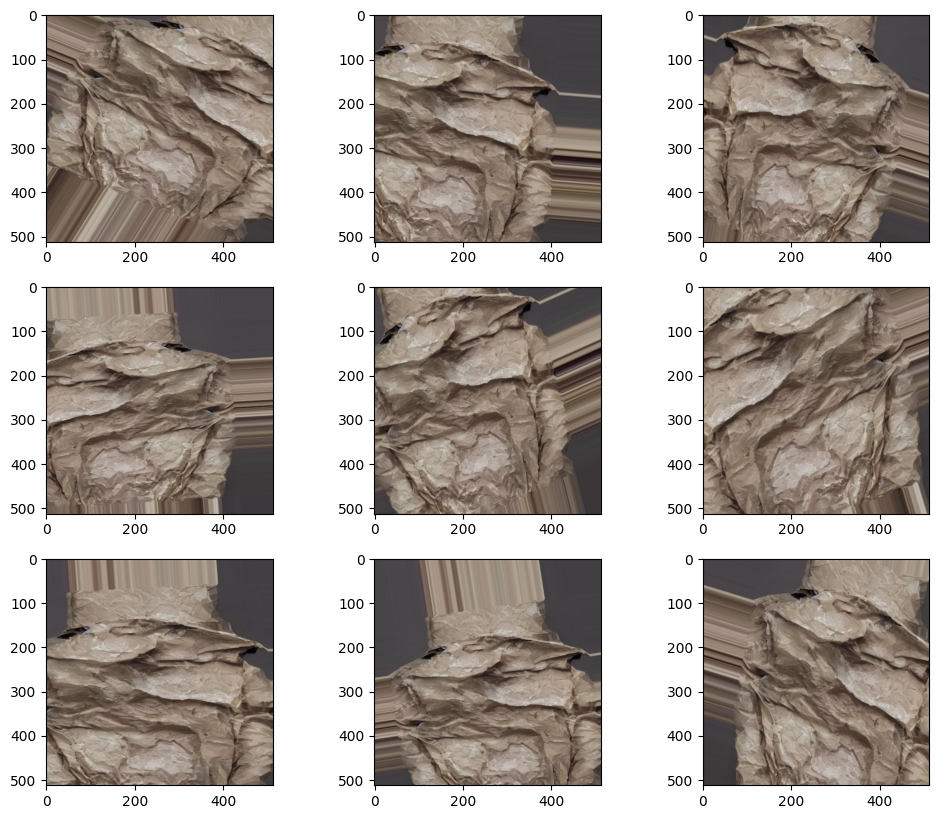

In [31]:
# Sample of Image Augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load the image
img = load_img('./datasets/AI art/train/fake/11548.jpg')
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
# Prepare iterator
it = datagen.flow(samples, batch_size=1)
plt.figure(figsize=(12,10))
# Generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # Generate batch of images
 batch = it.next()
 # Convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # Plot raw pixel data
 plt.imshow(image)
# Show the figure
plt.show()

In [32]:
# Training Model
history = classifier.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)

Epoch 1/5
  90/1731 [>.............................] - ETA: 3:58 - loss: 0.4519 - accuracy: 0.8473

d:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1731/1731 [==============================] - 479s 276ms/step - loss: 0.4390 - accuracy: 0.8250 - val_loss: 0.4155 - val_accuracy: 0.8253
Epoch 2/5
1731/1731 [==============================] - 277s 160ms/step - loss: 0.4260 - accuracy: 0.8261 - val_loss: 0.4049 - val_accuracy: 0.8262
Epoch 3/5
1731/1731 [==============================] - 259s 150ms/step - loss: 0.4122 - accuracy: 0.8358 - val_loss: 0.5414 - val_accuracy: 0.8283
Epoch 4/5
1731/1731 [==============================] - 256s 148ms/step - loss: 0.4028 - accuracy: 0.8382 - val_loss: 0.4067 - val_accuracy: 0.8290
Epoch 5/5
1731/1731 [==============================] - 258s 149ms/step - loss: 0.3970 - accuracy: 0.8416 - val_loss: 0.4122 - val_accuracy: 0.8313


Text(0.5, 1.0, 'Accuracy Curve')

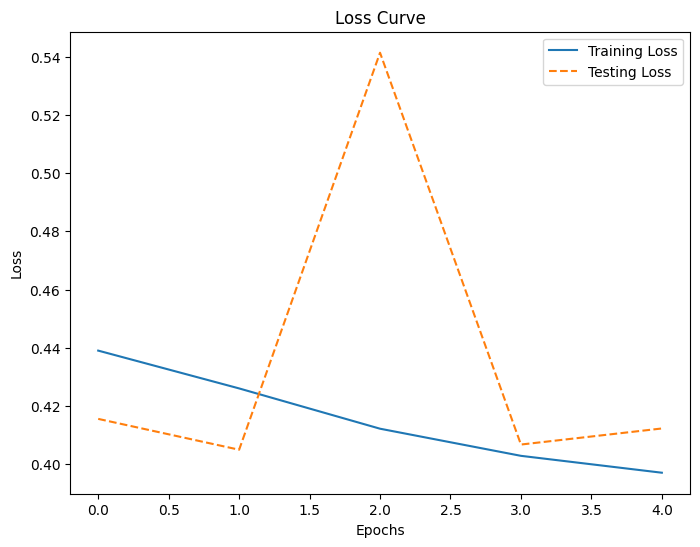

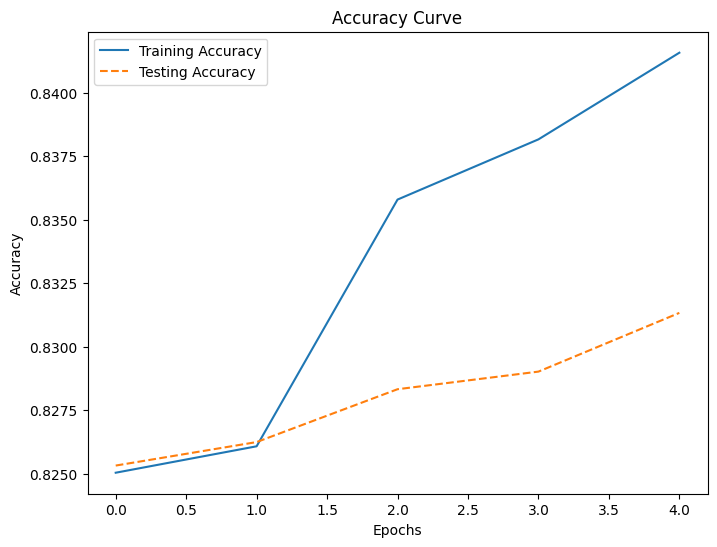

In [34]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")